In [1]:
import numpy as np  # for numerics (matrix math)
from scipy.sparse import diags  # for numerics (creating diagonal matrix)
from scipy.stats import gaussian_kde  # for numerics (DOS)
import matplotlib.pyplot as plt  # for plotting

# for vector plots:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Setting up the Hamiltonian

In [2]:
def make_H_W(Ef0, t, D, N):
    H = np.eye(N+1)
    H[0, 0] = Ef0
    host_band = np.linspace(0, D, N)
    H[1:, 1:] *= host_band
    w = np.cos(np.pi/2 * np.arange(N)/N)
    H[1:, 0] = w*t
    W = np.insert(w, 0, 1.)
    return H, W

In [3]:
Ef0 = 1.
#E1 = .001
N = 1250  # number of host states
D = 2.5  # "bandwidth" of host states (note: this is not the real bandwidth as it scales the number of states)
t = 0.02251 # hybridization
H, W = make_H_W(Ef0, t, D, N)

(-0.5, 1250.5, 1250.5, -0.5)

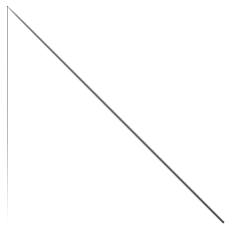

In [4]:
from matplotlib.colors import SymLogNorm
plt.imshow(H, cmap='gist_yarg', norm=SymLogNorm(linthresh=t/10), rasterized=True)
plt.axis('off')

In [5]:
ew, ev = np.linalg.eigh(H)
print(ew)

[-2.09052344e-02  5.66814316e-04  2.67966114e-03 ...  2.49599680e+00
  2.49799840e+00  2.50000000e+00]


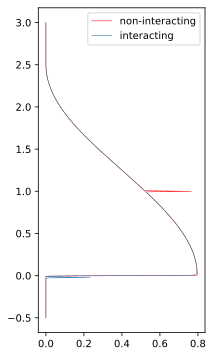

In [6]:
dos_ni = gaussian_kde(H.diagonal(), 0.005, weights=W**2)
dos_i = gaussian_kde(ew, 0.005, weights=W**2)

plt.figure(figsize=(3.0, 6.0))
xrange = np.linspace(-0.5, 3, 1000)
plt.plot(dos_ni.pdf(xrange), xrange, color='red', lw=0.5, label='non-interacting')
plt.plot(dos_i.pdf(xrange), xrange, lw=0.5, label='interacting')
plt.legend()

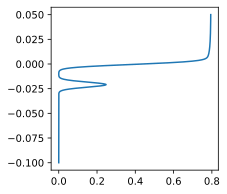

In [7]:
plt.figure(figsize=(3.0, 3.0))
xrange_zoom = np.linspace(-0.1, 0.05, 1000)
plt.plot(dos_i(xrange_zoom), xrange_zoom)

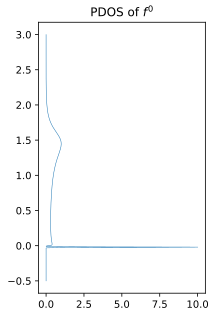

In [8]:
plt.figure(figsize=(3.0, 5.0)); plt.title('PDOS of $f^0$')
w_f0 = ev[0]**2
plt.plot(gaussian_kde(ew, 0.005, weights=w_f0).pdf(xrange), xrange, lw=0.5)

Text(0.5, 0.98, 'Contribution to ground state')

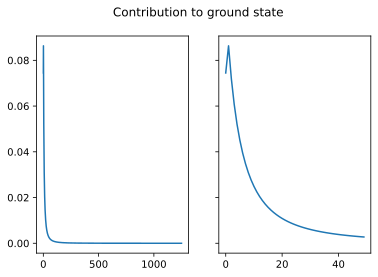

In [9]:
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].plot(ev[:, 0]**2)
axs[1].plot(ev[:50, 0]**2)
plt.suptitle('Contribution to ground state')

Text(0.5, 1.0, 'Cumulative contribution to ground state')

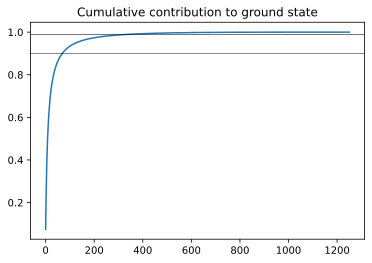

In [10]:
plt.plot(np.cumsum(ev[:, 0]**2))
plt.axhline(0.9, color='k', lw=0.5)
plt.axhline(0.99, color='k', lw=0.5)
plt.title('Cumulative contribution to ground state')

## Influence of parameter $D$

In [11]:
factors = np.linspace(3/4, 4/3, 11)
H_seriesD = [make_H_W(Ef0, t, a*D, int(a*N))[0] for a in factors]
gs_ews = [np.linalg.eigvalsh(H)[0] for H in H_seriesD]

Text(0.5, 0, '$D / D_0 $')

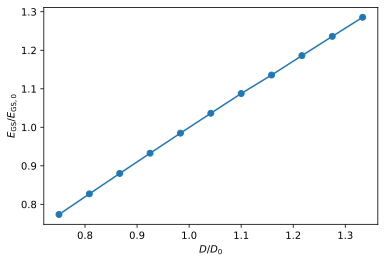

In [12]:
plt.plot(factors, gs_ews/ew[0], '-o')
plt.ylabel(r"$E_\mathrm{GS} / E_{\mathrm{GS},0} $")
plt.xlabel("$D / D_0 $")

## Influence of parameter $t$

In [13]:
factors = np.linspace(3/4, 4/3, 11)
H_seriest = [make_H_W(Ef0, a*t, D, N)[0] for a in factors]
gs_ews = [np.linalg.eigvalsh(H)[0] for H in H_seriest]

Text(0.5, 0, '$t / t_0 $')

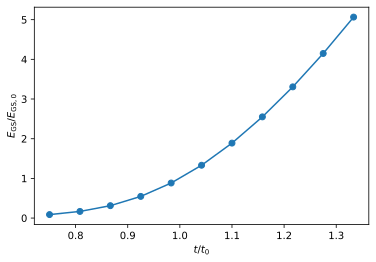

In [14]:
plt.plot(factors, gs_ews/ew[0], '-o')
plt.ylabel(r"$E_\mathrm{GS} / E_{\mathrm{GS},0} $")
plt.xlabel("$t / t_0 $")

## Influence of parameter $E_{f^0}$

In [15]:
factors = np.linspace(3/4, 4/3, 11)
H_seriesEf0 = [make_H_W(a*Ef0, t, D, N)[0] for a in factors]
gs_ews = [np.linalg.eigvalsh(H)[0] for H in H_seriesEf0]

Text(0.5, 0, '$E_{f^0} / E_{f^0,0} $')

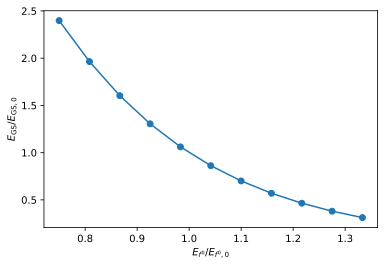

In [16]:
plt.plot(factors, gs_ews/ew[0], '-o')
plt.ylabel(r"$E_\mathrm{GS} / E_{\mathrm{GS},0} $")
plt.xlabel("$E_{f^0} / E_{f^0,0} $")

# Adding a second band (CEF, SO, ...)

In [17]:
H_new, W_new = make_H_W(Ef0, 0.01918, D, N)  # change t to maintain same T_K
H2 = np.eye(2*N + 1)
H2[:N+1, :N+1] = H_new
delta_so = 0.3  # 300meV SO split
host_band = H_new.diagonal()[1:]
H2[N+1:, N+1:] *= host_band + delta_so
H2[N+1:, 0] = H_new[1:N+1, 0]

W2 = np.hstack([W_new[0], W_new[1:], W_new[1:]])

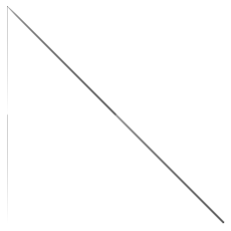

In [18]:
plt.imshow(H2, cmap='gist_yarg', norm=SymLogNorm(linthresh=t/10), rasterized=True)
plt.axis('off');

In [19]:
ew, ev = np.linalg.eigh(H2)
print(ew)

[-2.08972726e-02  5.55812280e-04  2.66475635e-03 ...  2.79599680e+00
  2.79799840e+00  2.80000000e+00]


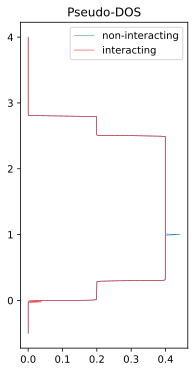

In [20]:
plt.figure(figsize=(3.0, 6.0)); plt.title('Pseudo-DOS')
xrange = np.linspace(-0.5, 4, 1000)

dos_ni = gaussian_kde(H2.diagonal(), 0.005).pdf(xrange)
dos_i = gaussian_kde(ew, 0.005).pdf(xrange)

plt.plot(dos_ni, xrange, lw=0.5, label='non-interacting')
plt.plot(dos_i, xrange, color='red', lw=0.5, label='interacting')
plt.legend()

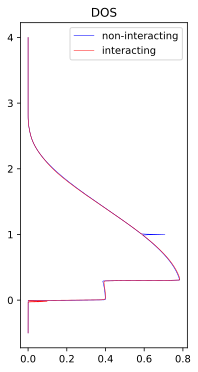

In [21]:
plt.figure(figsize=(3.0, 6.0)); plt.title('DOS')
plt.plot(gaussian_kde(H2.diagonal(), 0.005, weights=W2**2).pdf(xrange), xrange, color='blue', lw=0.5, label='non-interacting')

W2_final = np.dot(W2, ev**2)  # ev: initial -> final representation
plt.plot(gaussian_kde(ew, 0.005, weights=W2_final**2).pdf(xrange), xrange, color='red', lw=0.5, label='interacting')
plt.legend()

[9.55467200e-02 6.94601177e-04 8.55041828e-04 ... 2.25996771e-09
 1.00121962e-09 2.49506884e-10]


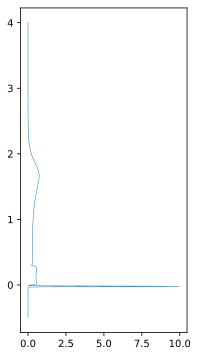

In [22]:
plt.figure(figsize=(3.0, 6.0))

w_f0 = ev[0]**2  #  equal to [1 0 0 0 0 ...] . ev**2, i.e. PDOS of initial f0 state
pdf = gaussian_kde(ew, 0.005, weights=w_f0).pdf(xrange)
plt.plot(pdf, xrange, lw=0.5)
print(ev[0]**2)

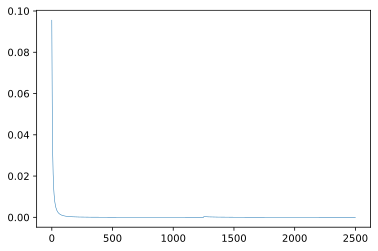

In [23]:
contrib_gs = ev[:, 0]**2  # weights of new ground state in terms of initial state
plt.plot(contrib_gs, lw=0.5)

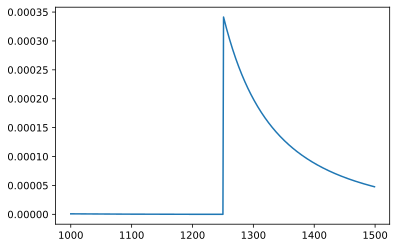

In [24]:
plt.plot(range(1000, 1500), contrib_gs[1000:1500])

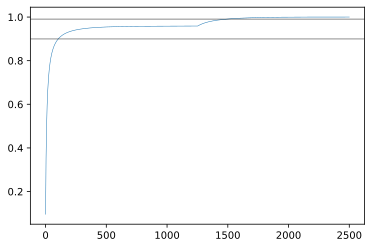

In [25]:
plt.plot(np.cumsum(contrib_gs), lw=0.5)
plt.axhline(0.9, alpha=0.3, color='k'); plt.axhline(0.99, alpha=0.3, color='k')